## Reddit Classifier Projects- Horror vs SciFi

### 2 - Model, Conclusions and Recommendations

### Contents

[**2.1 Model Prep** ](#prep)<br>

[**2.2 Logistic Regression modelling** ](#lr_model)<br>
*    [2.21a Logistic Regression with Count Vectorizer ](#lr1)<br>
*    [2.21b Coefficients and Feature Names](#lr1coef) <br>
*    [2.22a Logistic Regression with Tfidf Vectorizer](#lr2) <br>
*    [2.22b Coefficients and Feature Names](#lr2coef) <br>

[**2.3 Naive Bayes modelling** ](#nb_model)<br>
*    [2.31a Naive Bayes with Count Vectorizer](#nb1) <br>
*    [2.31b Coefficients and Feature Names](#nb1coef) <br>
*    [2.32a Naive Bayes with Tfidf Vectorizer](#nb2) <br>
*    [2.32b Coefficients and Feature Names](#nb2coef) <br>

[**2.4 Random Forest modelling**](#rf_model) <br>
*    [2.41a Random Forest with Count Vectorizer](#rf1) <br>
*    [2.41b Features and Feature Importance Scores](#rf1coef) <br>
*    [2.42a Random Forest with Tfidf Vectorizer](#rf2) <br>
*    [2.42b Features and Feature Importance Scores](#rf2coef) <br>

[**2.5 Model Evaluation**](#eval) <br>
*    [2.51 ROC Curve ](#roc)<br>
*    [2.52 Confusion Matrix](#cm) <br>
    
[**2.6 Final Model Analysis**](#final) <br>
*    [2.61 Recap of Coefficients and Features](#recap) <br>
*    [2.62 Misclassified Posts](#misclass) <br>

[**2.7 Conclusion**](#conclu) <br>

In [1]:
#importing 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, precision_recall_fscore_support
from sklearn import metrics
from nltk.corpus import stopwords

In [2]:
#reading the csv
df = pd.read_csv('reddit_combined.csv')

In [3]:
df.shape

(1466, 3)

### 2.1 Model Prep <a class="anchor" id="prep"></a>

In [4]:
#set X and y variables
X = df['posts']
y = df['target']

In [5]:
# Looking at baseline
y.value_counts(normalize=True)

0    0.50955
1    0.49045
Name: target, dtype: float64

We see no severely unbalanced classes as both look roughly proportional. The baseline model will predict class 0 (r/shortscifistories) most of the time as it has a slightly higher accuracy score (50.95%).

In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    stratify=y)

### 2.2 Logistic Regression modelling <a class="anchor" id="lr_model"></a>

We will use the logistic regression model to predict either class 0 or 1. We will also be using different vectorizers per model.

#### 2.21a Logistic Regression with Count Vectorizer <a class="anchor" id="lr1"></a>

In [7]:
#adding the subreddit names to stopwords
stopword_list = stopwords.words('english')
stopword_list.extend(['nosleep', 'shortscifistories', 'scifi', 'sci', 'fi', 'sci fi', 'sci-fi'])

In [8]:
#pipeline

lr1_pipeline = Pipeline([('cvec', CountVectorizer(stop_words=stopword_list)), ('log_r', LogisticRegression(max_iter=500))])

In [9]:
# Fit the model
lr1_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log_r', LogisticRegression(max_iter=500))])

In [10]:
#Train score
lr1_pipeline.score(X_train, y_train)

1.0

In [11]:
# Test score
lr1_pipeline.score(X_test, y_test)

0.9483471074380165

We note something odd here, that the training accuracy is 100%.  This could be an indicator that we overfit the data.However, looking at the test score, we note that the overfit might not be severe as there is a drop of 5.2% on the test data, which seems reasonable.

In [12]:
#param for gridsearch
lr1_params = {
   'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1, 1),(1, 2)],
}

In [13]:
#5 fold gridsearchcv
gs_lr1 = GridSearchCV(lr1_pipeline, param_grid = lr1_params, cv=5, verbose=1)

#fit to train data
gs_lr1.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  5.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [14]:
gs_lr1.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=3000, min_df=3,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log_r', LogisticRegression(max_iter=500))])

In [15]:
# save best model 
gs_lr1_model = gs_lr1.best_estimator_

In [16]:
#best score
gs_lr1.best_score_

0.9602817776856936

In [17]:
# Score model on training set.
gs_lr1_model.score(X_train, y_train)

1.0

In [18]:
lr1_model_train_score = gs_lr1_model.score(X_train, y_train)

In [19]:
# Score model on testing set.
gs_lr1_model.score(X_test, y_test)

0.9462809917355371

In [20]:
lr1_model_test_score = gs_lr1_model.score(X_test, y_test)

In [21]:
# creating lists to store model names, scores and parameters for evaluation

model_name = []
model_train_scores = []
model_test_scores = []
model_best_score = []
model_estimators = []

model_name.append('Logistic Regression with CountVectorizer')
model_train_scores.append(lr1_model_train_score)
model_test_scores.append(lr1_model_test_score)
model_best_score.append(gs_lr1.best_score_)
model_estimators.append(gs_lr1_model)


 We note that after using GridSearch with a 5 fold cross validation, the train score for our best model is still 1.0.
 However, the test accuracy has slightly dropped to about 94.6% compared to the earlier train score of around 94.8%. There is a drop of about 5.4% in accuracy score for the test set, which still seems reasonable.

#### 2.21b Getting coefficients and feature names for logistic regression model with countvectorizer <a class="anchor" id="lr1coef"></a>

In [22]:
coef_names_lr1 = gs_lr1_model.steps[0][1].get_feature_names()
coef_lr1 = gs_lr1_model.steps[1][1].coef_[0]
#creating dataframe for tokens and their corresponding coefficientss
tokens_lr1 = pd.DataFrame({'token': coef_names_lr1, 'coefficient': coef_lr1}).set_index('token')

In [23]:
tokens_lr1.sort_values(by='coefficient').head(20)

,coefficient
token,
world,-0.270257
child,-0.264110
light,-0.260308
new,-0.209954
planet,-0.189315
puddle,-0.188142
george,-0.180121
charlotte,-0.179563
earth,-0.171871


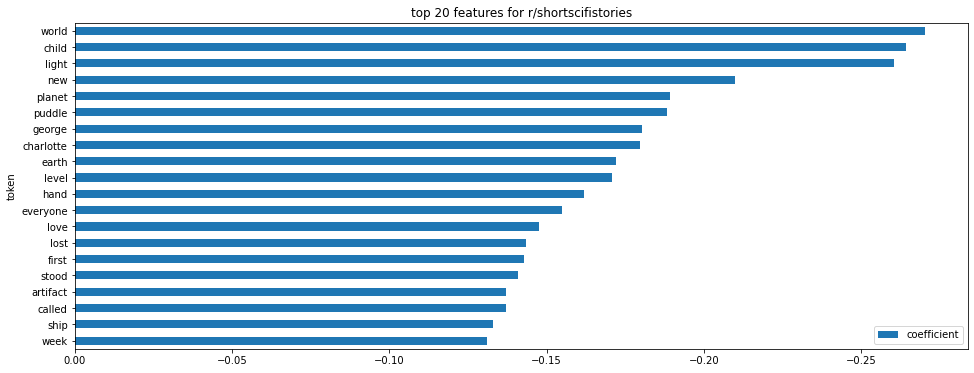

In [24]:
#plotting the barchart to visualise top 20 features
tokens_lr1.sort_values(by='coefficient').head(20).plot(kind='barh', figsize=(16,6))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('top 20 features for r/shortscifistories');

In [25]:
#getting the top 20 tokens for r/nosleep
tokens_lr1.sort_values(by='coefficient').tail(20)

,coefficient
token,
ran,0.216563
pop,0.223929
year,0.224149
get,0.229770
teeth,0.232059
heard,0.232339
night,0.233997
tried,0.244405
hear,0.245283


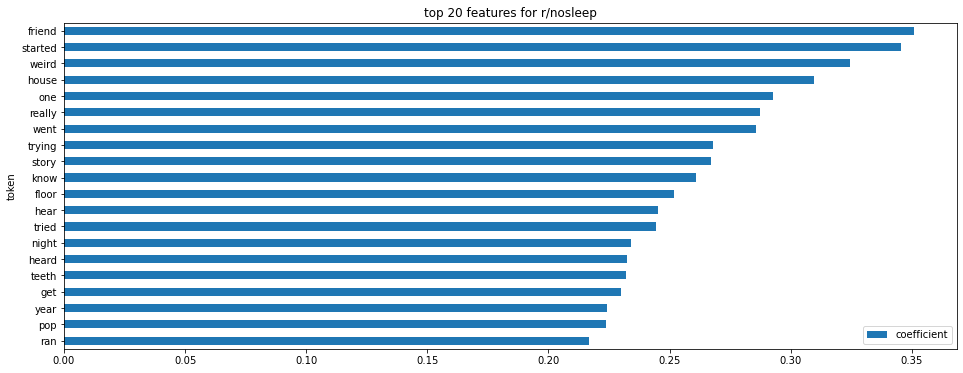

In [26]:
tokens_lr1.sort_values(by='coefficient').tail(20).plot(kind='barh',figsize=(16,6))
plt.title('top 20 features for r/nosleep');

The coefficients returned here represent the log odds of a token occurring in each class. If the log odds are positive, the token will be classified to '1', which we earlier defined as r/nosleep. If the log odds are negative, it will be classified to '0' or r/shortscifistories. 

This means that if the logit is a positive value, the exponentiated log odds will be > 1. This means an increase in the probability of the event when you have a positive change in the independent variable. The converse is true for logits with negative values.

For the shortscifi stories subreddit, we see that the most important tokens/features (high coefficients) are related to planets or space travel, e.g. world, earth, planet, ship, artifacts etc.

For the nosleep subreddit, we see that words related to senses, e.g. hear, heard have larger importance. Some features familiar to the genre, e.g. weird and night are also appear to be important.

#### 2.22a Logistic Regression with Tfidf vectorizer <a class="anchor" id="lr2"></a>

In [27]:
#pipeline
lr2_pipeline = Pipeline([('tvec', TfidfVectorizer(stop_words=stopword_list)), ('log_r', LogisticRegression(max_iter=500))])

In [28]:
#param for gridsearch
lr2_params = {
   'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [0.9, 0.95],
    'tvec__ngram_range': [(1, 1),(1, 2)],
}

In [29]:
# Fit the model
lr2_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log_r', LogisticRegression(max_iter=500))])

In [30]:
# Train score
lr2_pipeline.score(X_train, y_train)

0.9775967413441955

In [31]:
# Test score
lr2_pipeline.score(X_test, y_test)

0.9338842975206612

Here we observe that using the TfidfVectorizer with Log Regression, we have a slightly lower score than CountVectorizer with Log Regression. Again, there does not seem to be any overfitting.

In [32]:
#5 fold gridsearchcv
gs_lr2 = GridSearchCV(lr2_pipeline, param_grid = lr2_params, cv=5, verbose=1)

#fit to train data
gs_lr2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  6.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [33]:
gs_lr2.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.9, max_features=5000, min_df=2,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log_r', LogisticRegression(max_iter=500))])

In [34]:
gs_lr2_model = gs_lr2.best_estimator_

In [35]:
#best score
gs_lr2.best_score_

0.9399305915259506

In [36]:
#train score
gs_lr2_model.score(X_train, y_train)

0.9663951120162932

In [37]:
lr2_model_train_score = gs_lr2_model.score(X_train, y_train)

In [38]:
#test score
gs_lr2_model.score(X_test, y_test)

0.9338842975206612

In [39]:
lr2_model_test_score = gs_lr2_model.score(X_test, y_test)

In [40]:
model_name.append('Logistic Regression with TfidfVectorizer')
model_train_scores.append(lr2_model_train_score)
model_test_scores.append(lr2_model_test_score)
model_best_score.append(gs_lr2.best_score_)
model_estimators.append(gs_lr2_model)


We see that although the train test scores for the best estimator of TfidfVectorizer with Log Regression is lower than that of CountVectorizer with Log Regression, there is lesser overfit. The delta is about ~3.3%.

#### 2.22b Getting coefficients and feature names for logistic regression model with tfidfvectorizer <a class="anchor" id="lr2coef"></a>

In [41]:
coef_names_lr2 = gs_lr2_model.steps[0][1].get_feature_names()
coef_lr2 = gs_lr2_model.steps[1][1].coef_[0]
#creating a dataframe for tokens and coefficients
tokens_lr2 = pd.DataFrame({'token': coef_names_lr2, 'coefficient': coef_lr2}).set_index('token')

In [42]:
tokens_lr2.sort_values(by='coefficient').head(20)

,coefficient
token,
earth,-1.185525
planet,-0.969874
ai,-0.961754
world,-0.919119
ship,-0.850411
artifact,-0.826702
system,-0.826652
universe,-0.786065
human,-0.767545


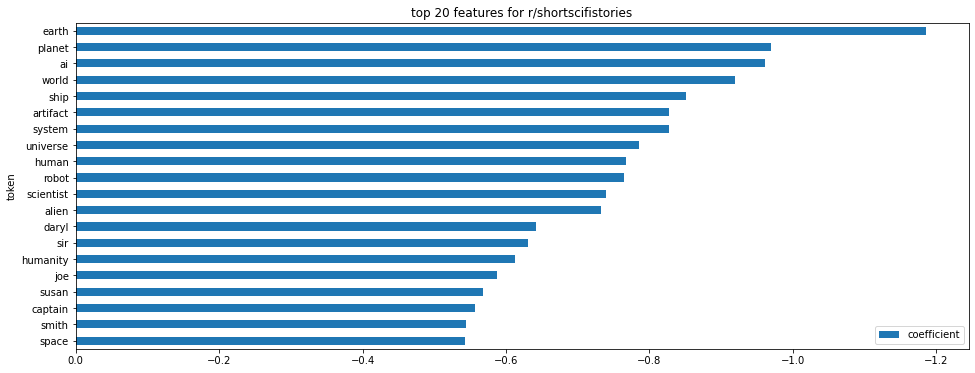

In [43]:
tokens_lr2.sort_values(by='coefficient').head(20).plot(kind='barh',figsize=(16,6))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('top 20 features for r/shortscifistories');

In [44]:
tokens_lr2.sort_values(by='coefficient').tail(20)

,coefficient
token,
go,1.072944
even,1.079735
look,1.093486
could,1.109990
went,1.145653
friend,1.153134
room,1.190734
eye,1.191086
car,1.192582


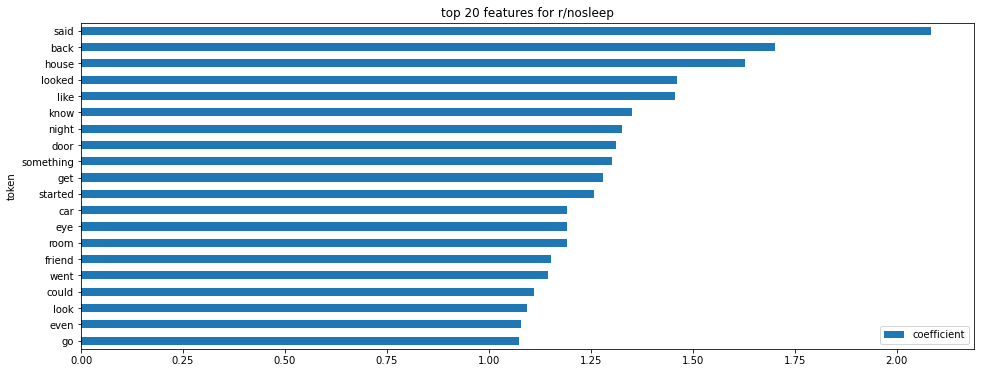

In [45]:
tokens_lr2.sort_values(by='coefficient').tail(20).plot(kind='barh',figsize=(16,6))
plt.title('top 20 features for r/nosleep');

We see that for this logistic model with tfidfvectorizer, a different set of features have higher likelihood for classifying the 2 subreddits. 

For shortscifistories, there are more tokens related to planets/galaxies, e.g. space, universe, alien. Terms related to artificial intelligence and robotics also start to become more prominent, e.g. ai, system, robot.

For nosleep, the important features seem to be still be related to senses, e.g. said, looked, eye etc. However, we note that hearing has now disappeared. Features like house and back start becoming more prominent, which makes sense as most stories might begin with haunted houses, or sensing something behind.

### 2.3 Naive Bayes modelling <a class="anchor" id="nb_model"></a>

We know that the Multinomial Naive Bayes method implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants commonly used in text classification. We will therefore proceed to fit the Multinomial NB model with our data.

#### 2.31a Naive Bayes with Count Vectorizer <a class="anchor" id="nb1"></a>

In [46]:
#setting up pipeline
pipeline_nb1 = Pipeline([
    ('cvec', CountVectorizer(stop_words=stopword_list)),
    ('nb', MultinomialNB())
])

In [47]:
pipe_nb1_params = {
    'cvec__max_df': [0.9, 0.95],
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__ngram_range': [(1, 1), (1, 2)],
}

In [48]:
#fit the model
pipeline_nb1.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [49]:
#Train score
pipeline_nb1.score(X_train, y_train)

0.960285132382892

In [50]:
#Test score
pipeline_nb1.score(X_test, y_test)

0.8533057851239669

The accuracy scores seem to have dropped after fitting it to the multinomial NB model, and our model does not seem to generalise well to unseen data.

In [51]:
#5 fold gridsearch cv 
gs_nb1 = GridSearchCV(pipeline_nb1, param_grid=pipe_nb1_params, cv=5, verbose=1)

gs_nb1.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  6.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [52]:
gs_nb1.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=4000, min_df=2,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [53]:
gs_nb1_model = gs_nb1.best_estimator_

In [54]:
#best score
gs_nb1.best_score_

0.8951362270796643

In [55]:
# best estimator train score
gs_nb1_model.score(X_train, y_train)

0.9389002036659878

In [56]:
nb1_model_train_score = gs_nb1_model.score(X_train, y_train)

In [57]:
#best estimator test score
gs_nb1_model.score(X_test, y_test)

0.871900826446281

In [58]:
nb1_model_test_score = gs_nb1_model.score(X_test, y_test)

In [59]:
model_name.append('Naive Bayes with CountVectorizer')
model_train_scores.append(nb1_model_train_score)
model_test_scores.append(nb1_model_test_score)
model_best_score.append(gs_nb1.best_score_)
model_estimators.append(gs_nb1_model)


We see that comparative to Log Regression with Count Vectorizer and Log Regression with Tfidf Vectorizer, the best estimator for Multinomial NB with CountVectorizer gives us a lower accuracy score for both train and test sets. Thus far, the Logistic Regression model with Tfidf Vectorizer seems the best model, considering both accuracy scores, and also the delta between the train and test accuracy.

#### 2.31b Getting coefficients and feature names for naive bayes model with countvectorizer <a class="anchor" id="nb1coef"></a>

In [60]:
#get coefficient names
coef_names_nb1 = gs_nb1_model.steps[0][1].get_feature_names()
coef_nb1 = gs_nb1_model.steps[1][1].coef_[0]
#scifi_token_count_nb1 = gs_nb1_model.steps[1][1].feature_count_[0, :]
#nosleep_token_count_nb1 = gs_nb1_model.steps[1][1].feature_count_[1, :]

# creating a pandas dataframe for coefficient names and coefficients
tokens_nb1 = pd.DataFrame({'token': coef_names_nb1, 'coefficient': np.exp(coef_nb1)}).set_index('token')

In [61]:
tokens_nb1.sort_values(by='coefficient').head(20)

,coefficient
token,
asteroid,0.000002
solar system,0.000002
lyla,0.000002
marsha,0.000002
jenny,0.000002
daryl,0.000002
president,0.000004
martian,0.000004
quantum,0.000004


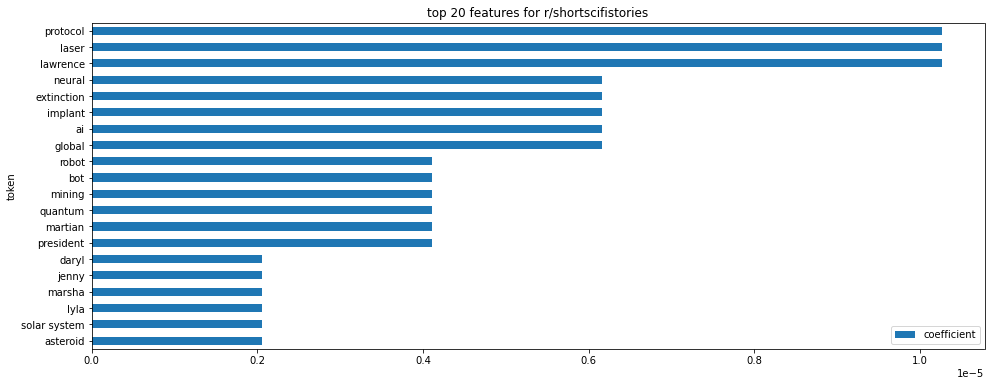

In [62]:
tokens_nb1.sort_values(by='coefficient').head(20).plot(kind='barh',figsize=(16,6))
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.title('top 20 features for r/shortscifistories');

In [63]:
tokens_nb1.sort_values(by='coefficient').tail(20)

,coefficient
token,
go,0.003435
hand,0.003507
still,0.003788
looked,0.003934
even,0.004135
around,0.004213
thing,0.004215
see,0.004429
door,0.004431


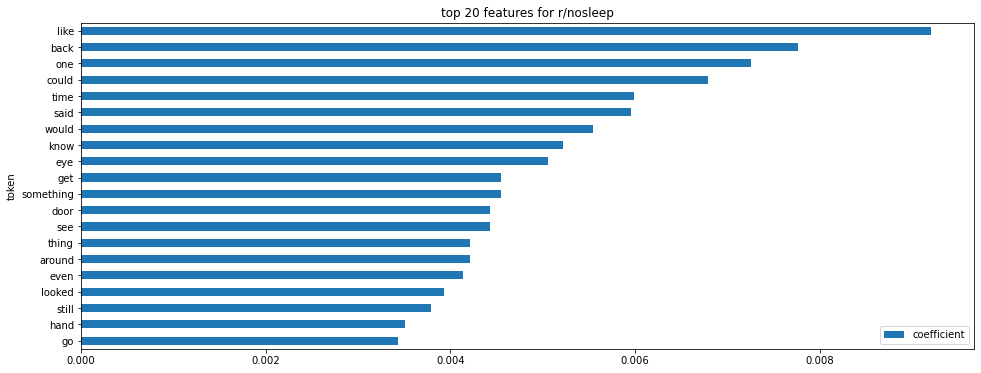

In [64]:
tokens_nb1.sort_values(by='coefficient').tail(20).plot(kind='barh',figsize=(16,6))
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.title('top 20 features for r/nosleep');

From sklearn documentation, we know that the coefficients for the Naive Bayes model corresponds to the empirical log probability of features given a class. After exponentiating the coefficients, we see the empirical probability of the features.

Our Naive Bayes model with Count Vectorizer has returned us some bigrams, e.g. solar system. We also see that there is some difference in the importance of the tokens compared to logistic regression. 

For shortscifistories, names e.g. daryl, jenny, marsha, lawrence etc. begin to appear as prominent features. It seems like our shortscifistories authors love to use these names as protagonists in their stories.  

There are different words related to planets or galaxies that appear: asteroid, solar system, wormhole, martian etc. Features like protocol, laser, neural and extinction, which did not appear when we were exploring the top 20 features for logistic regression, have also assumed more importance in this model.

For nosleep, e.g. looked, eye, back are still within the top 20 most important features.

#### 2.32a Naive Bayes with Tfidf Vectorizer <a class="anchor" id="nb2"></a>

In [65]:
#setting up pipeline
pipeline_nb2 = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stopword_list)),
    ('nb', MultinomialNB())
])

In [66]:
pipe_nb2_params = {
    'tvec__max_df': [0.9, 0.95],
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df': [2, 3],
    'tvec__ngram_range': [(1, 1), (1, 2)],
}

In [67]:
#fit the model
pipeline_nb2.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [68]:
#Train score
pipeline_nb2.score(X_train, y_train)

0.8309572301425662

In [69]:
#Test score
pipeline_nb2.score(X_test, y_test)

0.7086776859504132

We see that the model performs worse in terms of accuracy than other models we have fitted, and it also does not seem to generalise well on unseen data.

In [70]:
#5 fold gridsearch cv 
gs_nb2 = GridSearchCV(pipeline_nb2, param_grid=pipe_nb2_params, cv=5, verbose=1)

gs_nb2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  5.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [71]:
gs_nb2.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.9, max_features=2000, min_df=2,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [72]:
gs_nb2_model = gs_nb2.best_estimator_

In [73]:
#best score
gs_nb2.best_score_

0.8931005904900031

In [74]:
# best estimator train score
gs_nb2_model.score(X_train, y_train)

0.9205702647657841

In [75]:
nb2_model_train_score = gs_nb2_model.score(X_train, y_train)

In [76]:
#best estimator test score
gs_nb2_model.score(X_test, y_test)

0.8636363636363636

In [77]:
nb2_model_test_score = gs_nb2_model.score(X_test, y_test)

In [78]:
model_name.append('Naive Bayes with TfidfVectorizer')
model_train_scores.append(nb2_model_train_score)
model_test_scores.append(nb2_model_test_score)
model_best_score.append(gs_nb2.best_score_)
model_estimators.append(gs_nb2_model)


We see that our best estimator score for Naive Bayes with TfidfVectorizer is lower than Naive Bayes with CountVectorizer. There is a drop of 5.7% in training accuracy score compared to testing accuracy score. 

#### 2.32b Getting coefficients and feature names for naive bayes model with tfidfvectorizer <a class="anchor" id="nb2coef"></a>

In [79]:
#get coefficient names
coef_names_nb2 = gs_nb2_model.steps[0][1].get_feature_names()
coef_nb2 = gs_nb2_model.steps[1][1].coef_[0]
#scifi_token_count_nb2 = gs_nb2_model.steps[1][1].feature_count_[0, :]
#nosleep_token_count_nb2 = gs_nb2_model.steps[1][1].feature_count_[1, :]

# creating a pandas dataframe for coefficient names and coefficients
tokens_nb2 = pd.DataFrame({'token': coef_names_nb2, 'coefficient': np.exp(coef_nb2) }).set_index('token')

In [80]:
tokens_nb2.sort_values(by='coefficient').head(20)

,coefficient
token,
daryl,0.000117
robot,0.000118
nbsp amp,0.000124
ai,0.000125
solar,0.000134
billion,0.000139
society,0.000143
technology,0.000143
intelligence,0.000144


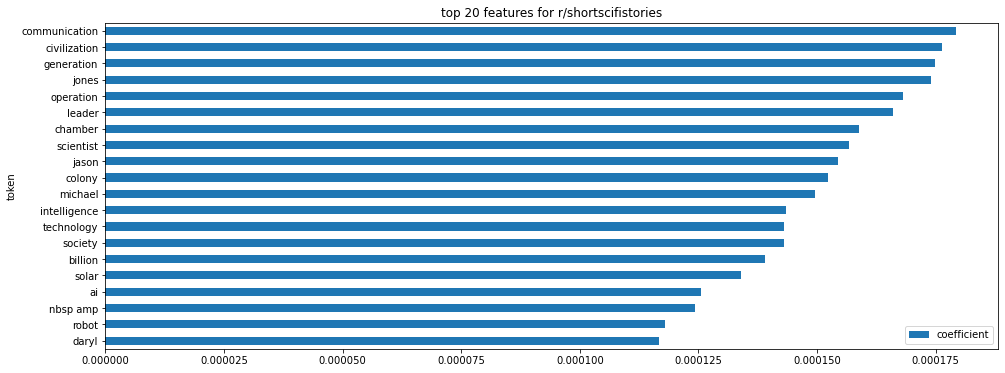

In [81]:
tokens_nb2.sort_values(by='coefficient').head(20).plot(kind='barh',figsize=(16,6))
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.title('top 20 features for r/shortscifistories');

In [82]:
tokens_nb2.sort_values(by='coefficient').tail(20)

,coefficient
token,
night,0.002243
even,0.002370
around,0.002372
see,0.002400
looked,0.002447
room,0.002453
thing,0.002484
amp,0.002520
get,0.002635


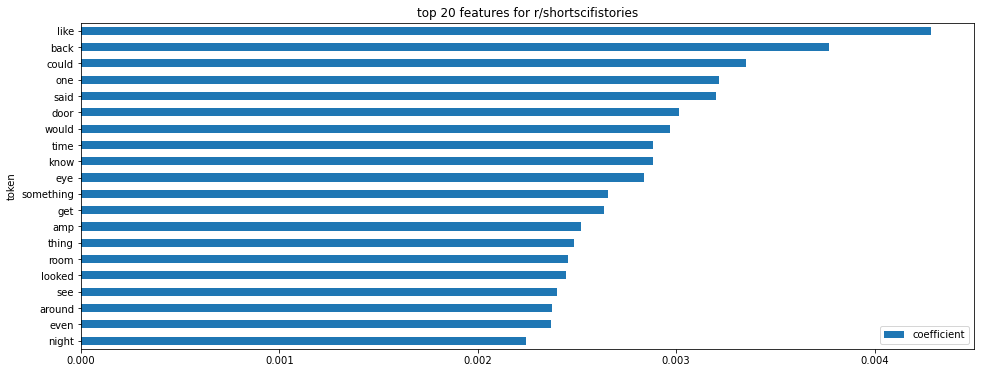

In [83]:
tokens_nb2.sort_values(by='coefficient').tail(20).plot(kind='barh',figsize=(16,6))
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.title('top 20 features for r/shortscifistories');

For this current Naive Bayes model with the TfidfVectorizer, the top 20 tokens seem to have changed, especially for the scifi subreddit. Tokens related to humanity and civilisation appears more important e.g. civilisation,society, generation, colony etc. ai and robots still feature in top 20.

For the nosleep subreddit, tokens like see, looked, eye, back are still considered important features.

### 2.4 Experimenting with Random Forests <a class="anchor" id="rf_model"></a>

We learned that Random Forests are ensemble methods that are used for classification and regression: they construct a multitude of decision trees during training and outputs the mode of the classes (for classification), or the average of the predictions (for regression). We will now try to fit a random forest model with our data. 

#### 2.41a Random forest model with countvectorizer <a class="anchor" id="rf1"></a>

In [84]:
#setting up pipeline
pipeline_rf1 = Pipeline([
    ('cvec', CountVectorizer(stop_words=stopword_list)),
    ('rf', RandomForestClassifier())
])

In [85]:
pipe_rf1_params = {
    'cvec__max_df': [0.9, 0.95],
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [100, 150],
    'rf__max_depth': [5, 6],    
}

In [86]:
#fit the model
pipeline_rf1.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf', RandomForestClassifier())])

In [87]:
#train score
pipeline_rf1.score(X_train, y_train)

1.0

In [88]:
#test score
pipeline_rf1.score(X_test, y_test)

0.9276859504132231

We see that the train score is 100% but the test score is about 92.3%. There is a drop in 7.7% accuracy.

In [89]:
#5 fold gridsearchcv
gs_rf1 = GridSearchCV(
    pipeline_rf1,
    param_grid=pipe_rf1_params,
    cv=5,
    verbose=1
)

gs_rf1.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed: 23.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [90]:
gs_rf1.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=4000, min_df=3,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf', RandomForestClassifier(max_depth=6))])

In [91]:
gs_rf1.best_score_

0.9439759660209261

In [92]:
gs_rf1_model = gs_rf1.best_estimator_

In [93]:
#train score
gs_rf1_model.score(X_train, y_train)

0.9857433808553971

In [94]:
rf1_model_train_score = gs_rf1_model.score(X_train, y_train)

In [95]:
#test score
gs_rf1_model.score(X_test, y_test)

0.9235537190082644

In [96]:
rf1_model_test_score = gs_rf1_model.score(X_test, y_test)

In [97]:
model_name.append('Random Forest with CountVectorizer')
model_train_scores.append(rf1_model_train_score)
model_test_scores.append(rf1_model_test_score)
model_best_score.append(gs_rf1.best_score_)
model_estimators.append(gs_rf1_model)

We see that our best estimator for the random forests model with countvectorizer gives us a train accuracy score of about 98.7% and a test accuracy score of about 92.1%. The drop in accuracy is about 6.2%.

#### 2.41b Getting important features and feature names for random forest model with countvectorizer <a class="anchor" id="rf1coef"></a>

In [101]:
#getting feature importance scores and feature names
rf1_feature_importances = np.mean([tree.feature_importances_ for tree in gs_rf1_model['rf'].estimators_], axis=0)
rf1_count_feature = gs_rf1_model['cvec'].get_feature_names()

# creating a dataframe for tokens and importance scores
rf1_top_feature = pd.DataFrame({'features random forest with cvec':rf1_count_feature,
              'top 20 feature importance scores':(rf1_feature_importances)}).sort_values(by='top 20 feature importance scores', ascending=False).head(20).set_index('features random forest with cvec')
rf1_top_feature

,top 20 feature importance scores
features random forest with cvec,
back,0.036638
something,0.034571
got,0.028535
like,0.019300
heard,0.019225
thing,0.018717
look,0.018553
left,0.017500
started,0.017486


Features like back, something, look, heard, saw seem to be important, and they also appear when we explore the coefficients and tokens for other models.

#### 2.42a Random forest model with tfidfvectorizer <a class="anchor" id="rf2"></a>

In [102]:
#setting up pipeline
pipeline_rf2 = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = stopword_list)),
    ('rf', RandomForestClassifier())
])

In [103]:
pipe_rf2_params = {
    'tvec__max_df': [0.9, 0.95],
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df': [2, 3],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [100, 150],
    'rf__max_depth': [5, 6],    
}

In [104]:
#fit the model
pipeline_rf2.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf', RandomForestClassifier())])

In [105]:
#train score
pipeline_rf2.score(X_train, y_train)

1.0

In [106]:
#test score
pipeline_rf2.score(X_test, y_test)

0.9256198347107438

We see that for this random forest model with tfidfvectorizer, the train accuracy score is 100%, whereas the test accuracy score is about 92.5%. There is a drop of 7.5% in accuracy score.

In [107]:
#5 fold gridsearchcv
gs_rf2 = GridSearchCV(
    pipeline_rf2,
    param_grid=pipe_rf2_params,
    cv=5,
    verbose=1
)

gs_rf2.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed: 22.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [108]:
gs_rf2.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.95, max_features=5000, min_df=2,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf', RandomForestClassifier(max_depth=6))])

In [109]:
gs_rf2.best_score_

0.9449963741841915

In [110]:
gs_rf2_model = gs_rf2.best_estimator_

In [111]:
#train score
gs_rf2_model.score(X_train, y_train)

0.9938900203665988

In [112]:
rf2_model_train_score = gs_rf2_model.score(X_train, y_train)

In [113]:
#test score
gs_rf2_model.score(X_test, y_test)

0.9173553719008265

In [114]:
rf2_model_test_score = gs_rf2_model.score(X_test, y_test)

In [115]:
model_name.append('Random Forest with TfidfVectorizer')
model_train_scores.append(rf2_model_train_score)
model_test_scores.append(rf2_model_test_score)
model_best_score.append(gs_rf2.best_score_)
model_estimators.append(gs_rf2_model)

We see that our best estimator for the random forests model with countvectorizer gives us a train accuracy score of about 99.3% and a test accuracy score of about 91.7%. The drop in accuracy is about 7.6%.

#### 2.42b Getting important features and feature names for random forest model with tfidfvectorizer <a class="anchor" id="rf2coef"></a>

In [119]:
#getting feature importance scores and feature names
rf2_feature_importances = np.mean([tree.feature_importances_ for tree in gs_rf2_model['rf'].estimators_], axis=0)
rf2_count_feature = gs_rf2_model['tvec'].get_feature_names()

# creating a dataframe for tokens and importance scores
rf2_top_feature = pd.DataFrame({'features random forest with tvec':rf2_count_feature,
              'top 20 feature importance scores':(rf2_feature_importances)}).sort_values(by='top 20 feature importance scores', ascending=False).head(20).set_index('features random forest with tvec')
rf2_top_feature

,top 20 feature importance scores
features random forest with tvec,
look,0.026181
looked,0.023411
behind,0.018949
get,0.018239
foot,0.017304
room,0.014740
started,0.014636
little,0.014600
saw,0.012535


Features like look, looked and behind seem to be very important for classification. They also appear in the top 20 coefficients and tokens for other models.

### 2.5 Model Evaluation <a class="anchor" id="eval"></a>

We will proceed to evaluate the models we have fitted, by putting them into a dataframe and sorting them based on deltas, which we define as the difference between the training score and test score. We will also plot roc curve and confusion matrix to visualise the effectiveness of the models and select the best model based on these few metrics: 

1) best score <br>
2) delta <br>
3) ROC AUC <br>
4) confusion matrix <br>
5) precision <br>
6) recall <br>

In [117]:
precision_list = []
recall_list = []
fscore_list = []


for model in model_estimators:
    y_preds = model.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_preds, average='macro')
    precision_list.append(precision)
    recall_list.append(recall)
    fscore_list.append(fscore)

model_eval = pd.DataFrame({
    'model': model_name,
    'train score': model_train_scores,
    'test score': model_test_scores,
    'best score': model_best_score,
    'precision': precision_list,
    'recall': recall_list,
    'f score': fscore_list
})

#computing delta to look at drop in accuracy score between train and test
model_eval['delta'] = model_eval['train score'] - model_eval['test score']

model_eval.sort_values(by='delta')

,model,train score,test score,best score,precision,recall,f score,delta
1,Logistic Regression with TfidfVectorizer,0.966395,0.933884,0.939931,0.933934,0.934112,0.933880,0.032511
0,Logistic Regression with CountVectorizer,1.000000,0.946281,0.960282,0.946734,0.946002,0.946222,0.053719
3,Naive Bayes with TfidfVectorizer,0.920570,0.863636,0.893101,0.877387,0.865628,0.862791,0.056934
4,Random Forest with CountVectorizer,0.985743,0.923554,0.943976,0.925137,0.922966,0.923381,0.062190
2,Naive Bayes with CountVectorizer,0.938900,0.871901,0.895136,0.879451,0.873384,0.871530,0.066999
5,Random Forest with TfidfVectorizer,0.993890,0.917355,0.944996,0.917549,0.917149,0.917286,0.076535


#### 2.51 ROC curve <a class="anchor" id="roc"></a>

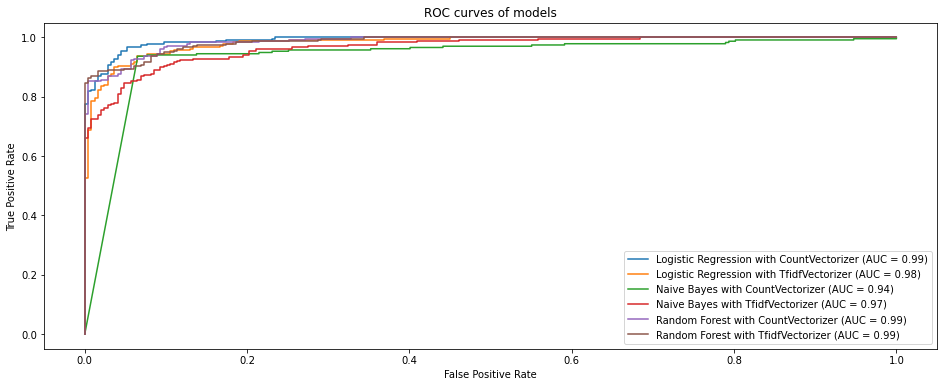

In [118]:
plt.figure(figsize=(16,6))
ax = plt.gca()
for model, name in zip(model_estimators, model_name):
    plot_roc_curve(model, X_test, y_test, name=name, ax=ax)

plt.title('ROC curves of models');

#### 2.52 Confusion matrix <a class="anchor" id="cm"></a>

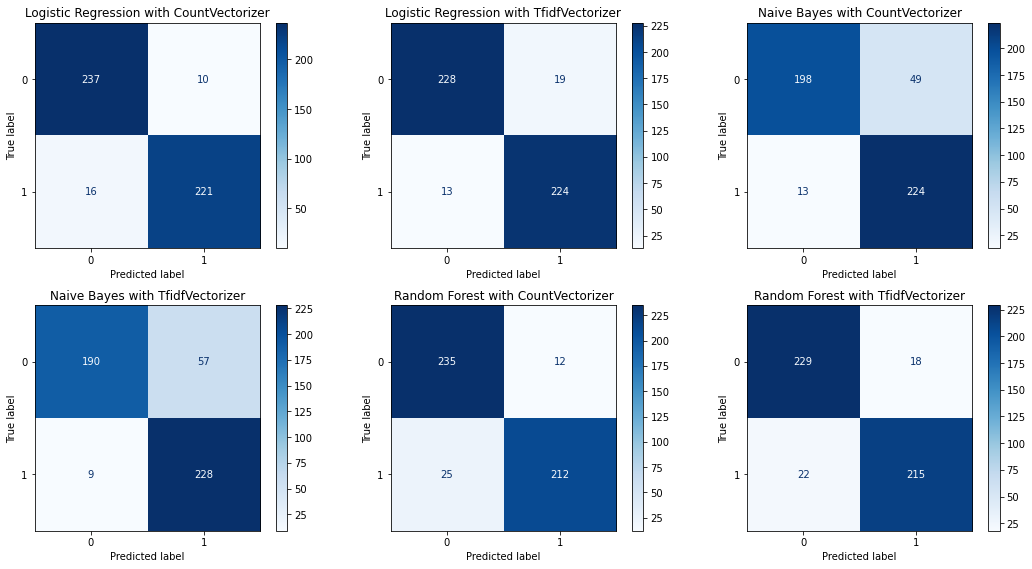

In [123]:
nrows = int(np.ceil(len(model_estimators) / 3))
fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))
ax = ax.ravel()

for i, model in enumerate(model_estimators):
    plot_confusion_matrix(model, 
                          X_test, 
                          y_test, 
                          ax=ax[i], 
                          cmap='Blues')
    ax[i].set_title(model_name[i])

plt.tight_layout()

From sklearn documentation, we know that:

Precision is the ratio tp/(tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The ROC curve or the receiver operating characteristic curve is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. The area under the curve (AUC) can be used as a summary of the model effectiveness in distinguishing between classes. 


For this model evaluation, we consider the following metrics:
1) Best score: This is the cross validated accuracy score we obtained using GridSearchCV. A good model would be one with a score closer to 1.0. <br> 
2) Delta: The difference between train vs test score. A good model would be one with the lowest delta as it means less overfitting comparatively. <br>
3) ROC AUC: A good model will have an AUC approaching 1. This means that it can distinguish reasonably well between the positive and negative classes (1 and 0).  <br>
4) Confusion Matrix: A good model will be one with the least false positives and false negatives. <br>
5) Precision: A high precision score means that our model is able to correctly classify more positives than negatives. <br>
6) Recall: A high recall score means that our model can correctly identify a high proportion of true positives. <br>


Taking the above metrics into consideration, we will be selecting the **Logistic Regression model with TfidfVectoriser**. Although it might not have the highest best score, it has the lowest delta, and the second highest precision, recall and auc scores.

### 2.6 Final Model Analysis <a class="anchor" id="final"></a>

We will now proceed to further analyse the best model we selected by analyzing misclassified posts. 

#### 2.61 Recap of coefficients and features for best model <a class="anchor" id="recap"></a>

We note that certain tokens influence our classifications. 

Our best model attempts to classify r/shortscifistories (class 0) using words related to planets and galaxies, such as earth, planet, world, universe, space. Words related to technology such as ai, system, robot are also prominent features for shortscifistories.

Our best model attempts to classify r/nosleep (class 1) using words related to senses such as look, looked, eye. Word related to houses, such as house, room, door and time of the day, such as night are also prominent features for nosleep.

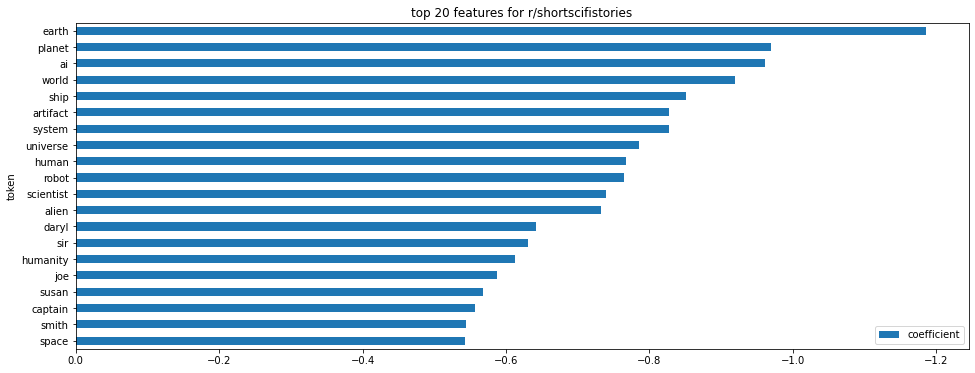

In [134]:
tokens_lr2.sort_values(by='coefficient').head(20).plot(kind='barh',figsize=(16,6))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('top 20 features for r/shortscifistories');

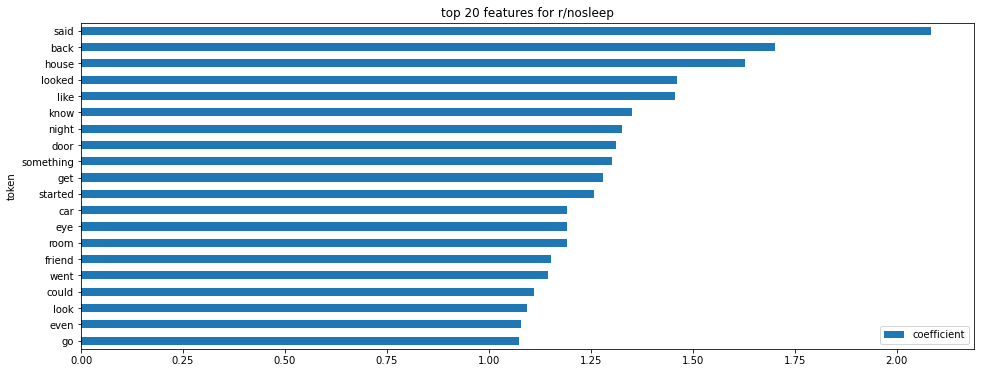

In [136]:
tokens_lr2.sort_values(by='coefficient').tail(20).plot(kind='barh',figsize=(16,6))
plt.title('top 20 features for r/nosleep');

#### 2.6.2 Misclassified posts (false negatives and false positives) <a class="anchor" id="misclass"></a>

We will now deep dive into misclassified posts, and do an analysis on why certain posts could be wrongly misclassified.

In [139]:
y_preds = gs_lr2_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

In [142]:
print(f'There are {(fp + fn)} misclassified posts out of {y_test.shape[0]}. There are {fp} false positives and {fn} false negatives.')

There are 32 misclassified posts out of 484. There are 19 false positives and 13 false negatives.


In [144]:
# Creating a dataframe for y_test and y_preds so we can look at misclassified posts

final_df = pd.DataFrame({
    'ground truth': y_test,
    'predictions': y_preds
})

final_df.head()

,ground truth,predictions
252,1,1
862,0,0
132,1,1
94,1,1
333,1,1


In [153]:
misclassified = final_df[final_df['ground truth'] != final_df['predictions']]
misclassified.head()

,ground truth,predictions
831,0,1
1287,0,1
1285,0,1
1454,0,1
989,0,1


In [155]:
#extracting a text that was wrongly misclassified as Class1 (nosleep), but was actually Class0 (shortscifistories)
X_test.loc[831]

'drip drop part see powerless lost home devoured spare pain embrace darkness gonna lie considering half body fire half invaded poisonous chill idea attractive lid eye slowly descend muscle relax resigned fate make peace end force eye open bully suffering limb raising foot stand sway cannot keep much longer see shining salvation beam bright gold light shine right side room light half face beam feel warmth righteousness cold creeping driven mad anguish pain focus see emitted ornate spear hovering rotating slowly stone floor warm antidote creature cool posison reach use put end monster calculate around metre away reach creature focussed least one piece look floor see battered canteen weathered hide strap ripped buckle spread across floor like tired tadpole grab canteen thrust air left arm scream protest bone grate lightning spark pain pulse arm canteen serf purpose eye peel away zone new enemy take chance force battered body limbing jog golden spear whole frame shake step every footfall c

In [159]:
# counting token matches for top 20 class1 features within the text above 

class_1_words = ['said', 'back', 'house', 'looked', 'like', 'know', 'night', 'door', 'something', 'get',
                 'started', 'car', 'eye', 'room', 'friend', 'went', 'could', 'look', 'even', 'go']
token_count = {}

for token in class_1_words:
    if token in X_test.loc[831]:
        token_count[token] = class_1_words.count(token)

token_count

{'said': 1,
 'house': 1,
 'looked': 1,
 'like': 1,
 'know': 1,
 'door': 1,
 'get': 1,
 'car': 1,
 'eye': 1,
 'room': 1,
 'friend': 1,
 'look': 1,
 'go': 1}

In [160]:
# counting token matches for top 20 class0 features within the text above

class_0_words = ['earth', 'planet', 'ai', 'world', 'ship', 'artifact', 'system', 'universe',
                 'human', 'robot', 'scientist', 'alien', 'daryl', 'sir', 'humanity', 'joe', 
                 'susan', 'captain', 'smith', 'space']

token_count_2 = {}

for token in class_0_words:
    if token in X_test.loc[831]:
        token_count_2[token] = class_0_words.count(token)

token_count_2

{'ai': 1}

Using post 831 as an example, we see why our model mistakenly classified it as class 1 (r/nosleep) instead of class 0 (r/shortscifistories). This is because tokens strongly related to class 1 appear more frequently in the text than tokens strongly related to class 0.

Post 831 happens to be part 2 of a 3 part series on short scifi stories titled Drip Drop, and this episode of the trilogy described in detail our protagonist's fight with a monster. This is likely why we observe the phenomenon mentioned above, where there are lesser words related to planets and technology.

### 2.7 Conclusion <a class="anchor" id="conclu"></a>

Horror and scifi do have some similiarities but are different genres in their own right. Certain sets of words define the respective genres and set them apart from each other. Some of the words that define the scifi genre are words related to technology, the galaxy and planets, e.g. ai, system, robot, earth etc.The words that define horror genres seem to be related to either the senses, e.g. seeing or hearing something, or to home related words like room, house, and door.

We also note that our best model, after considering all 6 metrics of best score, delta, ROC AUC, confusion matrix, precision and recall, was the Logistic Regression model with the TfidfVectorizer. Our model's best score was about 93.99%, which performed better than baseline. Out of the test data of 484 posts, our model misclassified 32 posts (19 false positives and 13 false negatives). We also took a step further to analyse the tokens for a false positive post, and found that the misclassification occurred because tokens from the positive class (class 1: r/nosleep) occurred more frequently than tokens from the negative class (class 0: r/shortscifistories).


If we had subreddit dedicated to full length scifi stories like nosleep, we could have come up with a better classifier as there could be more tokens that could further distinguish the 2 genres.